<h2> Exploring the Central Limit Theorem </h2>

In this notebook, we're going to explore the central limit theorem. The theorem says that, for *iid* samples $X_1,X_2,...,X_n$ from a common distribution, and $\overline{X}_n = \frac{1}{n}\sum_i X_i$ the sample mean,

$$\frac{\overline{X}_n - \mu}{\sigma / \sqrt{n}} \to Z \sim \mathcal{N}(0,1)$$

as $n\to \infty$.

Just like last week, let's start by taking $n=30$ samples from a common distribution. This time from an *Exponential* with $\lambda = 1/10$.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [63]:
n=30
num_samples = 10000
lamb = 1/10
samples = np.random.exponential(size = (num_samples,n),scale = 1/lamb)

In [64]:
samples.shape

(10000, 30)

In [65]:
xbar_samples = samples.mean(axis = 1)

Notice that if we use `samples.mean` and we add `axis = 1`, then the averaging is applied to each row, so that we have 10000 samples of $\overline{X}_{30}$.

In [66]:
xbar_samples.shape

(10000,)

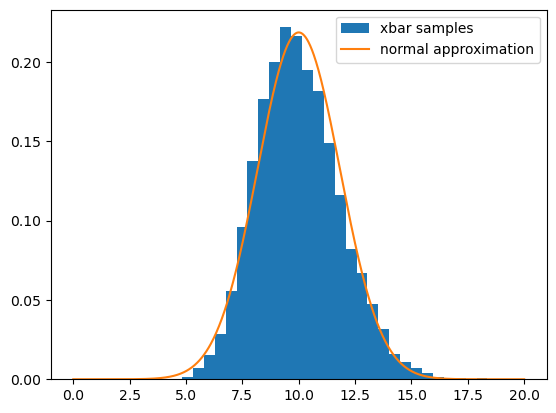

In [67]:
# set the mean and standard deviation values
n = 30
mu = 10
sigma = 10

# Set the range of where to plot the normal density
X = np.linspace(0,20,1000)
density_curve = scipy.stats.norm.pdf(X,loc = mu, scale = sigma/n**.5)

# plot the histogram and the density curve
plt.hist(xbar_samples,bins = 30,density=True,label = 'xbar samples')
plt.plot(X,density_curve,label = 'normal approximation')
plt.legend()

Great! Now let's *properly re-scale* $\overline{X}$ to make it $Z = \frac{\overline{X}-\mu}{\sigma/\sqrt{n}}$ and plot a corresponding bell curve next to it.

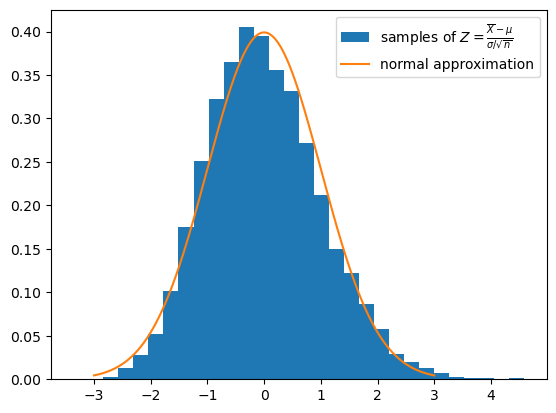

In [68]:
# Set the range of where to plot the normal density
X = np.linspace(-3,3,1000)
density_curve = scipy.stats.norm.pdf(X,loc = 0, scale = 1)

Z = (xbar_samples - mu)/(sigma/n**.5)
plt.hist(Z,bins = 30,density=True,label = r'samples of $Z = \frac{\overline{X} - \mu}{\sigma/\sqrt{n}}$')
plt.plot(X,density_curve,label = 'normal approximation')
plt.legend()

Notice how the samples are *centered* at $0$ and have standard deviation approximately $1$ now that we have normalized $\overline{X}$ to $Z= \frac{\overline{X}_n - \mu}{\sigma / \sqrt{n}}$.

### Going from $n=30$ to $n=200$

Now let's set $n=200$ and estimate the probability that the average of $200$ exponential random variables with $\lambda = 1/10$ is bigger than $10.2$.

In [69]:
# Write a code that estimates the probability P(Xbar>10.2) when n = 300


n=200
num_samples = 100000
lamb = 1/10
samples = np.random.exponential(size = (num_samples,n),scale = 1/lamb)

xbars = samples.mean(axis = 1)


prob1 = (xbars>10.2).mean()
print(prob1)

0.37862


### Compare this with the corresponding normal value

Notice that 


$$P(\overline{X} > 10.2) = P(\overline{X} - 10 > 0.2)$$

and then we can divide by $\sigma / \sqrt{n}$:
$$P(\frac{\overline{X} - 10}{10/\sqrt{200}} > \frac{0.2}{10/\sqrt{200}}) \approx P(Z> 0.28)$$



In [70]:
prob2 = 1-scipy.stats.norm.cdf(0.28)
print(prob1,prob2)

0.37862 0.38973875244420275


### Using a Z table

Use the table below to look up the value $P(Z > 0.28)$.


<img src="images/z-table.png" style="float: center; width: 50%">

In [82]:
### Chat GPT generated

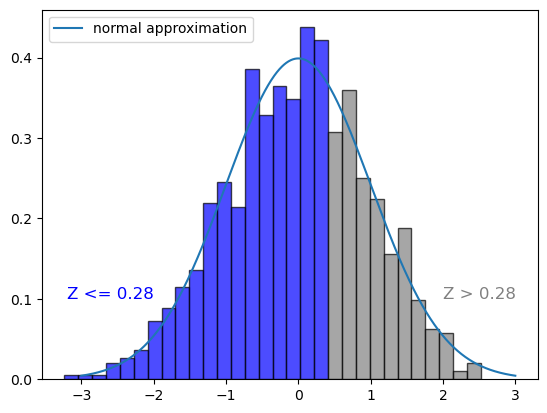

In [83]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
mu = 0  # population mean
sigma = 1  # population standard deviation
n = 30  # sample size
xbar_samples = np.random.normal(mu, sigma / np.sqrt(n), 1000)  # generate sample data

# Set the range of where to plot the normal density
X = np.linspace(-3, 3, 1000)
density_curve = scipy.stats.norm.pdf(X, loc=0, scale=1)

Z = (xbar_samples - mu) / (sigma / n**0.5)
bins = np.linspace(min(Z), max(Z), 31)  # 30 bins
hist, bin_edges = np.histogram(Z, bins=bins, density=True)

# Plot the histogram with conditional shading
for i in range(len(bin_edges) - 1):
    if bin_edges[i] > 0.28:
        plt.bar((bin_edges[i] + bin_edges[i + 1]) / 2, hist[i], width=bin_edges[i + 1] - bin_edges[i], color='gray', edgecolor='black', alpha=0.7)
    else:
        plt.bar((bin_edges[i] + bin_edges[i + 1]) / 2, hist[i], width=bin_edges[i + 1] - bin_edges[i], color='blue', edgecolor='black', alpha=0.7)

# Plot the normal approximation
plt.plot(X, density_curve, label='normal approximation')
plt.legend()


plt.text(2, 0.1, 'Z > 0.28', fontsize=12, color='gray')
plt.text(-3.2, 0.1, 'Z <= 0.28', fontsize=12, color='blue')

plt.show()